In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from pymer4.models import Lmer
from pymer4.stats import rsquared, rsquared_adj
import re

In [2]:
inPATH = '../data/training/iapar/cper_biomass_iapar_2014_2022.csv'
inPATH_grazing = '../data/ground/grazing/CARM_ActualGrazingInfov3_2013-2023.csv'

In [3]:
df = pd.read_csv(inPATH, parse_dates=True)
df_grazing = pd.read_csv(inPATH_grazing)

In [4]:
df_grazing[df_grazing['PastureCode'] == 'NH'] = '10S'

In [5]:
df = df.dropna(subset=['Date', 'Total_Biomass', 'iAPAR']).copy().reset_index()

In [6]:
df_grazing_in = pd.merge(df, df_grazing[['PastureCode', 'Year', 'DateInPasture']],
         left_on=['Pasture', 'Year'],
         right_on=['PastureCode', 'Year'],
         how='left')

In [7]:
df_grazing_in = df_grazing_in.set_index('index')

In [8]:
df = df.set_index('index')

In [9]:
df['DateInPasture'] = df_grazing_in.drop_duplicates(subset=['Id', 'Year'], keep='first')['DateInPasture']

In [10]:
df['DateInPasture'] = pd.to_datetime(df['DateInPasture'])

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
def calc_graze_timing(x):
    if pd.isnull(x['DateInPasture']):
        if x['Treatment'] in ['TGM', 'NEW_HVY']:
            timing = 'Season-long'
        else:
            timing = 'Ungrazed'
    elif x['DateInPasture'] > x['Date']:
        timing = 'Ungrazed'
    elif x['DateInPasture'].dayofyear > 196:
        timing = 'Ungrazed'
    elif x['DateInPasture'].dayofyear <= 196:
        timing = 'Pulse'
    return timing
        

In [24]:
df['Graze_timing'] = df.apply(lambda x: calc_graze_timing(x), axis=1)

In [25]:
df["Total_Biomass_sqrt"] = np.sqrt(df['Total_Biomass'])
df['Block'] = df['Block'].astype(int).astype(str)

In [26]:
df['Ecosite'] = pd.Categorical(df['Ecosite'],
                               categories=['Loamy', 'Sandy', 'Salt Flats'])
df['Graze_timing'] = pd.Categorical(df['Graze_timing'],
                               categories=['Ungrazed', 'Season-long', 'Pulse'])

In [27]:
df_sub = df[df['Treatment'].isin(['TGM', 'AGM'])].copy()

/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

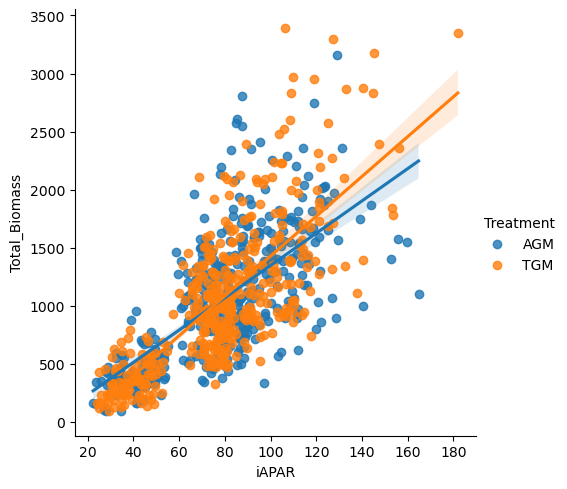

In [28]:
plt.figure()
sns.lmplot(x='iAPAR', y='Total_Biomass', hue='Treatment', ci=95, 
           data=df_sub)
plt.show()

/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

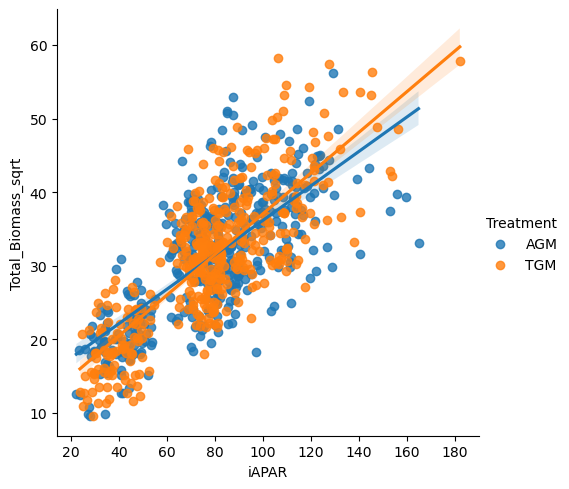

In [29]:
plt.figure()
sns.lmplot(x='iAPAR', y='Total_Biomass_sqrt', hue='Treatment', ci=95, 
           data=df_sub)
plt.show()

/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

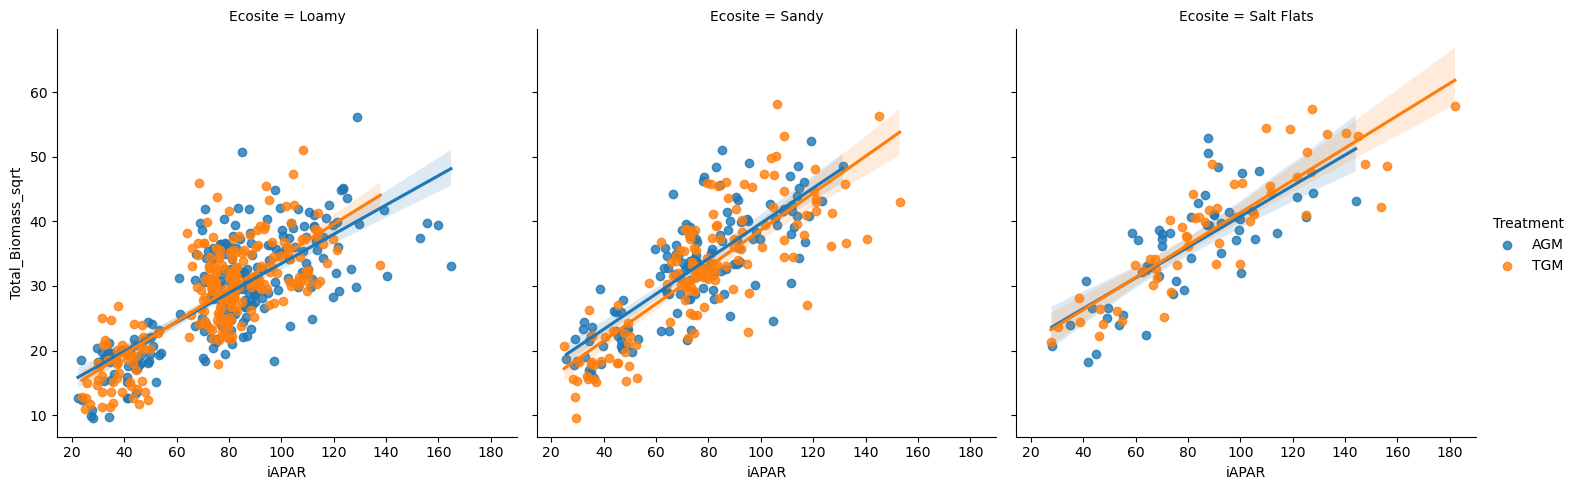

In [30]:
plt.figure()
sns.lmplot(x='iAPAR', y='Total_Biomass_sqrt', hue='Treatment', col='Ecosite', ci=95, 
           data=df_sub)
plt.show()

/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

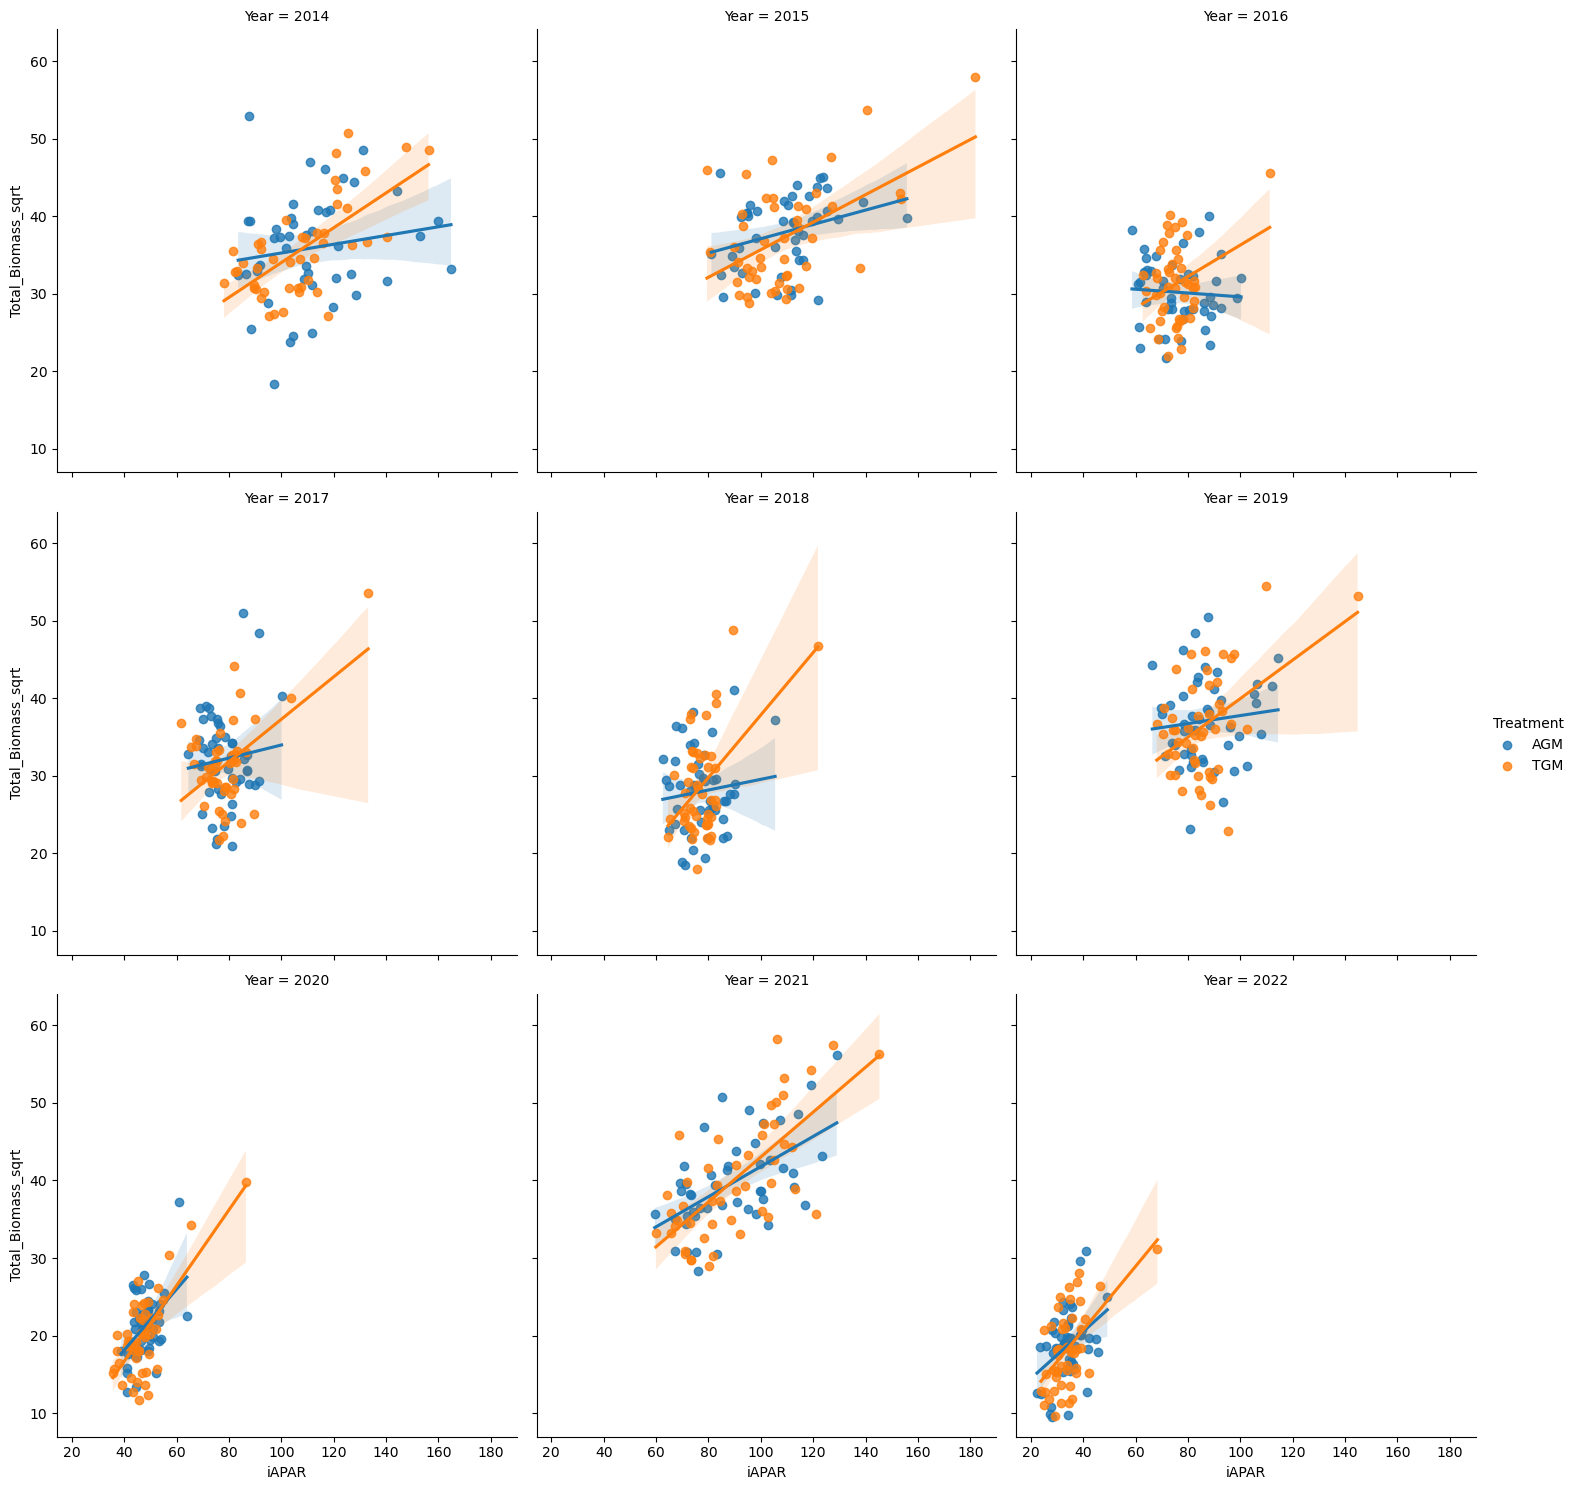

In [31]:
plt.figure()
sns.lmplot(x='iAPAR', y='Total_Biomass_sqrt', hue='Treatment', col='Year', col_wrap=3, ci=95, 
           data=df_sub)
plt.show()

/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

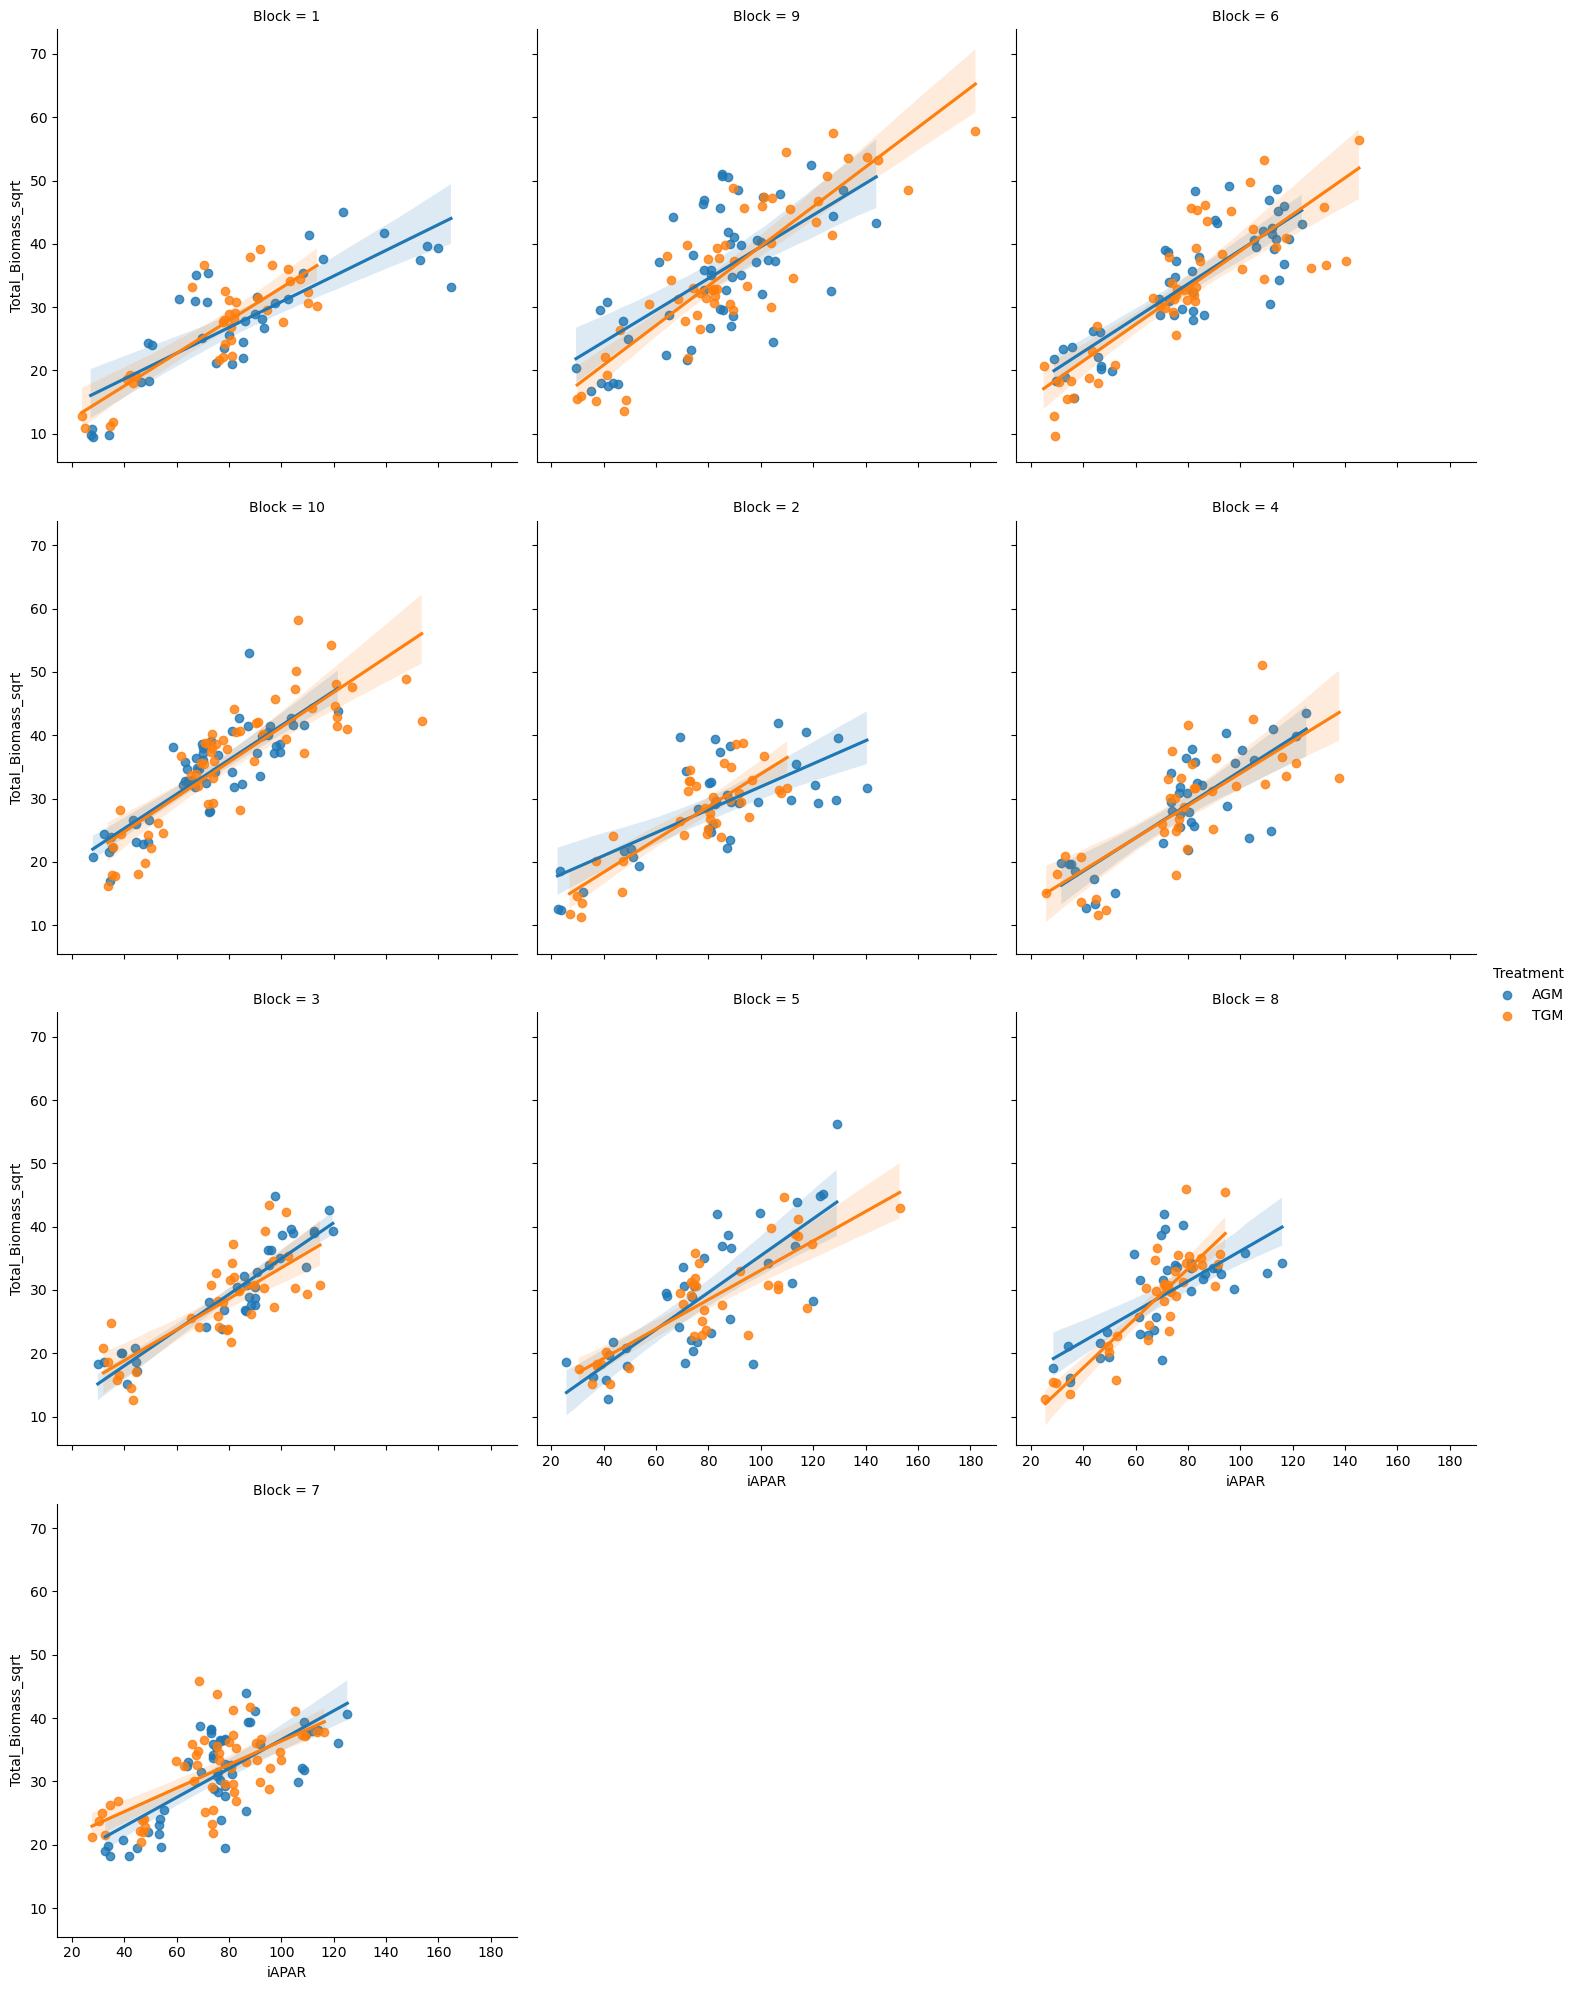

In [32]:
plt.figure()
sns.lmplot(x='iAPAR', y='Total_Biomass_sqrt', hue='Treatment', col='Block', col_wrap=3, ci=95, 
           data=df_sub)
plt.show()

/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

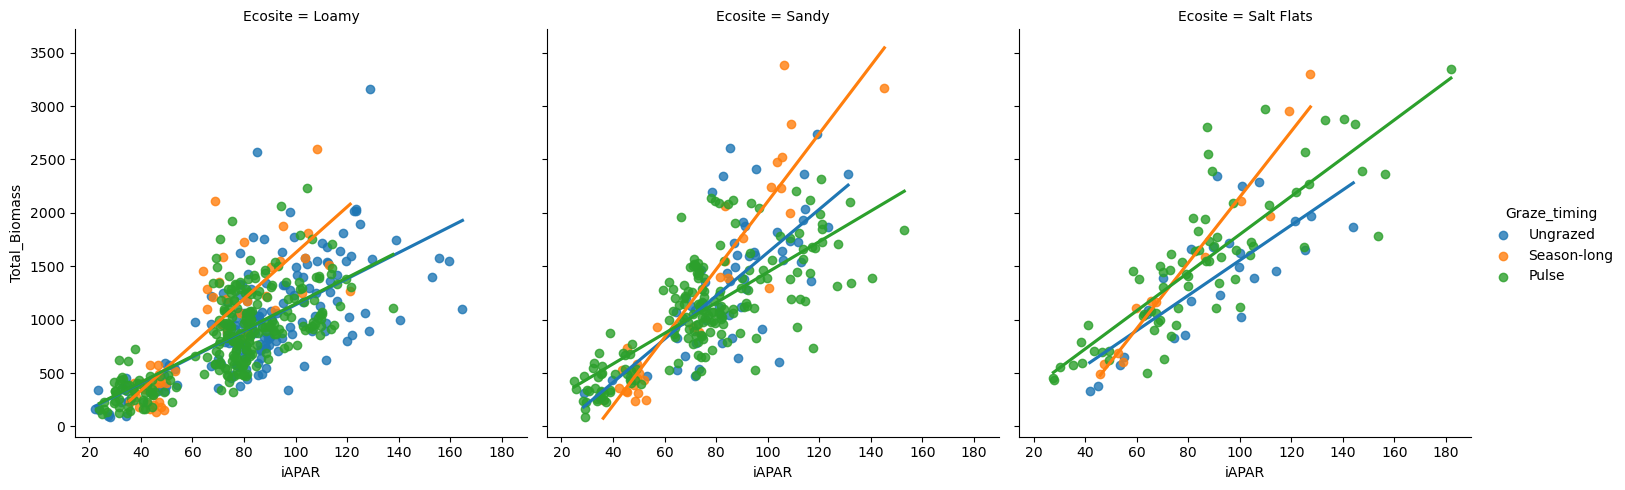

In [33]:
plt.figure()
sns.lmplot(x='iAPAR', y='Total_Biomass', hue='Graze_timing', col='Ecosite', ci=None, 
           data=df_sub)
plt.show()

/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

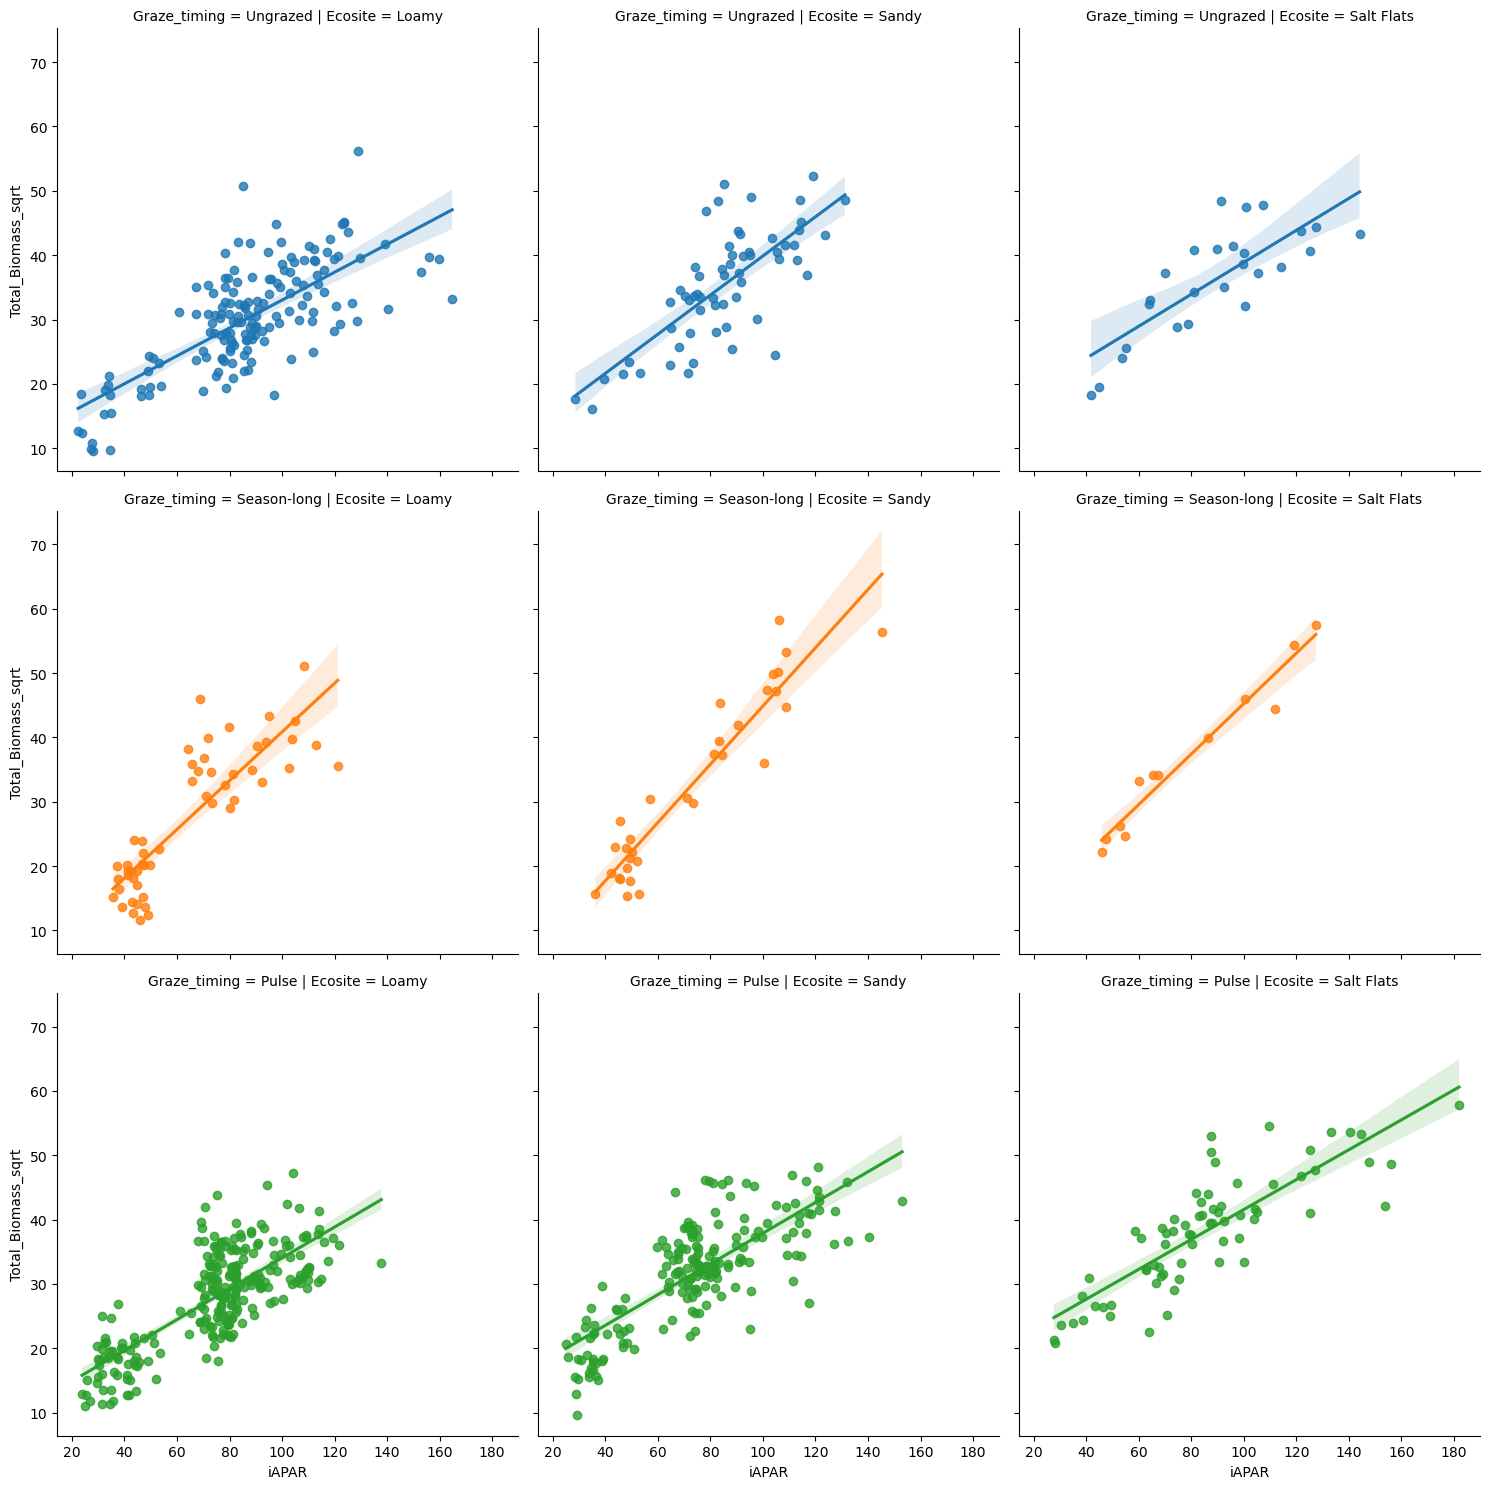

In [34]:
plt.figure()
sns.lmplot(x='iAPAR', y='Total_Biomass_sqrt', hue='Graze_timing', col='Ecosite', row='Graze_timing', ci=95, 
           data=df_sub)
plt.show()

In [35]:
# fit the null model, single slope for iAPAR
# NOTE: tried adding + (1|Block:Pasture) to account for pasture effect, but fit was singular and effect was 0
md_mm_orig = Lmer('Total_Biomass ~ iAPAR + (1|Year) + (1|Year:Block)', data=df_sub)
display(md_mm_orig.fit())

md_mm_sqrt = Lmer('Total_Biomass_sqrt ~ iAPAR + (1|Year) + (1|Year:Block)', data=df_sub)
display(md_mm_sqrt.fit())

Linear mixed model fit by REML [’lmerMod’]
Formula: Total_Biomass~iAPAR+(1|Year)+(1|Year:Block)

Family: gaussian	 Inference: parametric

Number of observations: 852	 Groups: {'Year:Block': 90.0, 'Year': 9.0}

Log-likelihood: -6154.010 	 AIC: 12318.021

Random effects:

                   Name        Var      Std
Year:Block  (Intercept)  43744.979  209.153
Year        (Intercept)  37028.078  192.427
Residual                 91447.762  302.403

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-49.559,-245.67,146.551,100.058,28.456,-0.495,0.624,
iAPAR,13.678,11.86,15.497,0.928,435.994,14.744,0.000,***


Linear mixed model fit by REML [’lmerMod’]
Formula: Total_Biomass_sqrt~iAPAR+(1|Year)+(1|Year:Block)

Family: gaussian	 Inference: parametric

Number of observations: 852	 Groups: {'Year:Block': 90.0, 'Year': 9.0}

Log-likelihood: -2536.228 	 AIC: 5082.455

Random effects:

                   Name     Var    Std
Year:Block  (Intercept)  10.424  3.229
Year        (Intercept)  14.029  3.746
Residual                 18.001  4.243

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),16.817,13.534,20.100,1.675,19.263,10.041,0.0,***
iAPAR,0.177,0.150,0.203,0.013,660.113,13.168,0.0,***


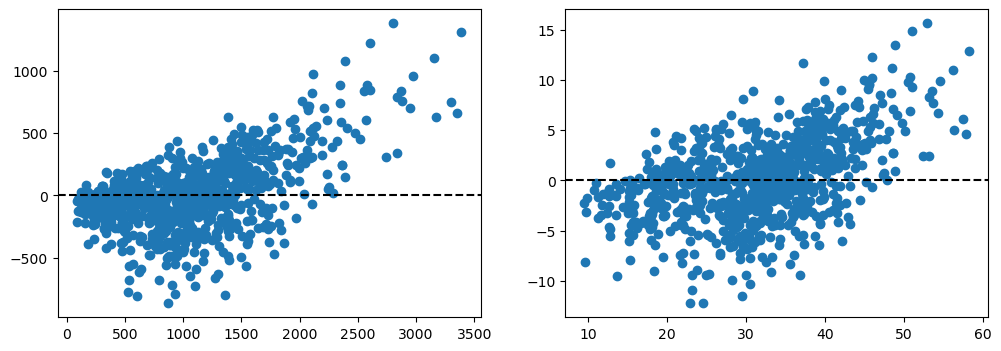

In [36]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].scatter(df_sub['Total_Biomass'], md_mm_orig.residuals)
axs[1].scatter(df_sub['Total_Biomass_sqrt'], md_mm_sqrt.residuals)
for ax in axs:
    ax.axhline(y=0, linestyle='dashed', c='black')

(array([  8.,  25.,  99., 201., 257., 151.,  76.,  25.,   6.,   4.]),
 array([-12.2179861 ,  -9.43346595,  -6.64894579,  -3.86442564,
         -1.07990549,   1.70461467,   4.48913482,   7.27365497,
         10.05817513,  12.84269528,  15.62721543]),
 <BarContainer object of 10 artists>)

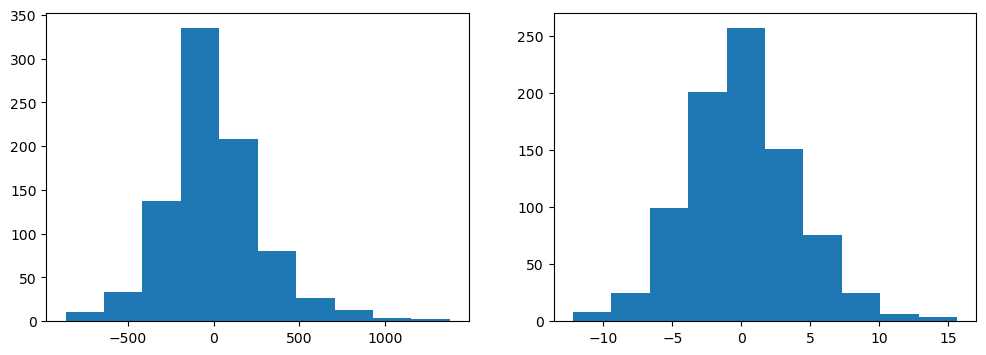

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].hist(md_mm_orig.residuals)
axs[1].hist(md_mm_sqrt.residuals)

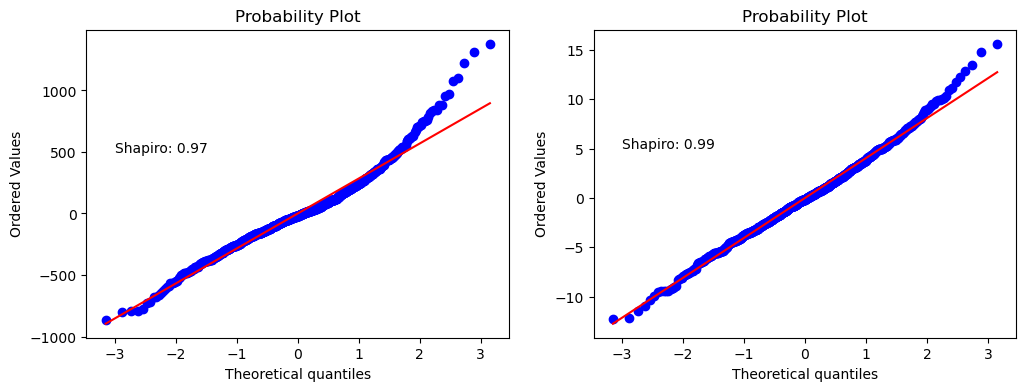

In [38]:
from scipy.stats import shapiro, probplot
import pylab


fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
probplot(md_mm_orig.residuals, dist="norm", plot=axs[0])
axs[0].text(-3, 500, 'Shapiro: ' + str(round(shapiro(md_mm_orig.residuals).statistic, 2)))
probplot(md_mm_sqrt.residuals, dist="norm", plot=axs[1])
axs[1].text(-3, 5, 'Shapiro: ' + str(round(shapiro(md_mm_sqrt.residuals).statistic, 2)))
plt.show()

In [39]:
y_var = 'Total_Biomass'
#axlims = (-0.25, 0.25)
axlims = (-5, 16)

In [40]:
# fit the null model, single slope for iAPAR
# NOTE: tried adding + (1|Block:Pasture) to account for pasture effect, but fit was singular and effect was 0
md_mm_null = Lmer(y_var + ' ~ iAPAR + (1|Year) + (1|Year:Block)', data=df_sub)
display(md_mm_null.fit())

Linear mixed model fit by REML [’lmerMod’]
Formula: Total_Biomass~iAPAR+(1|Year)+(1|Year:Block)

Family: gaussian	 Inference: parametric

Number of observations: 852	 Groups: {'Year:Block': 90.0, 'Year': 9.0}

Log-likelihood: -6154.010 	 AIC: 12318.021

Random effects:

                   Name        Var      Std
Year:Block  (Intercept)  43744.979  209.153
Year        (Intercept)  37028.078  192.427
Residual                 91447.762  302.403

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-49.559,-245.67,146.551,100.058,28.456,-0.495,0.624,
iAPAR,13.678,11.86,15.497,0.928,435.994,14.744,0.000,***


Linear mixed model fit by REML [’lmerMod’]
Formula: Total_Biomass~iAPAR+Treatment:iAPAR+(1|Year)+(1|Year:Block)

Family: gaussian	 Inference: parametric

Number of observations: 852	 Groups: {'Year:Block': 90.0, 'Year': 9.0}

Log-likelihood: -6153.754 	 AIC: 12319.508

Random effects:

                   Name        Var      Std
Year:Block  (Intercept)  43571.777  208.739
Year        (Intercept)  36995.508  192.342
Residual                 91427.632  302.370

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-50.169,-246.198,145.859,100.016,28.469,-0.502,0.62,
iAPAR,13.537,11.704,15.369,0.935,443.735,14.478,0.00,***
iAPAR:TreatmentTGM,0.301,-0.190,0.793,0.251,763.257,1.201,0.23,


<Axes: xlabel='Estimate'>

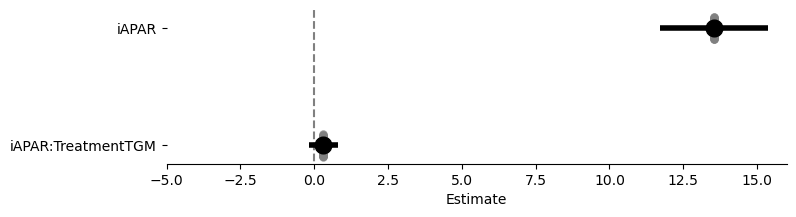

In [41]:
md_mm_treatment = Lmer(y_var + ' ~ iAPAR + Treatment:iAPAR  + (1|Year) + (1|Year:Block)', data=df_sub)
display(md_mm_treatment.fit())
md_mm_treatment.plot_summary(plot_intercept=False, figsize=(8, 2), axlim=axlims)

Linear mixed model fit by REML [’lmerMod’]
Formula: Total_Biomass~iAPAR+Graze_timing:iAPAR+(1|Year)+(1|Year:Block)

Family: gaussian	 Inference: parametric

Number of observations: 852	 Groups: {'Year:Block': 90.0, 'Year': 9.0}

Log-likelihood: -6148.747 	 AIC: 12311.493

Random effects:

                   Name        Var      Std
Year:Block  (Intercept)  41319.474  203.272
Year        (Intercept)  35281.697  187.834
Residual                 90967.358  301.608

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-82.108,-277.054,112.838,99.464,29.403,-0.826,0.416,
iAPAR,13.487,11.674,15.300,0.925,416.368,14.582,0.000,***
iAPAR:Graze_timingSeason-long,1.348,0.191,2.504,0.590,771.920,2.284,0.023,*
iAPAR:Graze_timingPulse,0.836,0.208,1.464,0.320,836.709,2.608,0.009,**


<Axes: xlabel='Estimate'>

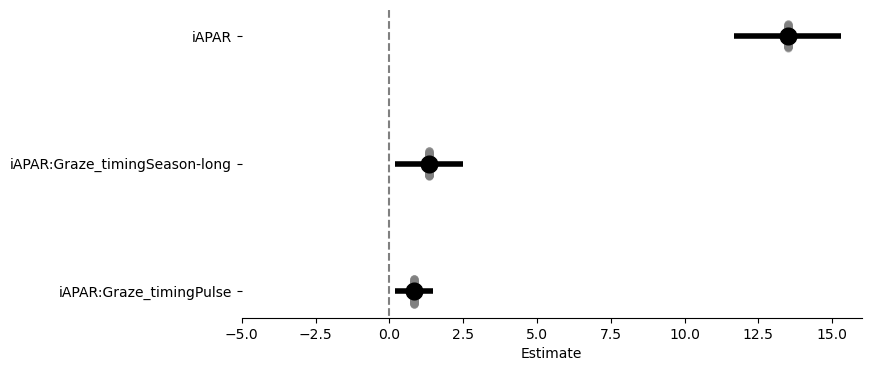

In [42]:
md_mm_graze = Lmer(y_var + ' ~ iAPAR + Graze_timing:iAPAR + (1|Year) + (1|Year:Block)', data=df_sub)
display(md_mm_graze.fit())
md_mm_graze.plot_summary(plot_intercept=False, figsize=(8, 4), axlim=axlims)

Linear mixed model fit by REML [’lmerMod’]
Formula: Total_Biomass~iAPAR+Ecosite:iAPAR+(1|Year)+(1|Year:Block)

Family: gaussian	 Inference: parametric

Number of observations: 852	 Groups: {'Year:Block': 90.0, 'Year': 9.0}

Log-likelihood: -6086.391 	 AIC: 12186.782

Random effects:

                   Name        Var      Std
Year:Block  (Intercept)  13868.121  117.763
Year        (Intercept)  51673.454  227.318
Residual                 83752.834  289.401

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),173.026,-32.651,378.702,104.939,22.703,1.649,0.113,
iAPAR,9.470,7.658,11.281,0.924,504.333,10.248,0.000,***
iAPAR:EcositeSandy,2.736,2.067,3.405,0.341,393.929,8.016,0.000,***
iAPAR:EcositeSalt Flats,5.366,4.558,6.174,0.412,686.040,13.015,0.000,***


<Axes: xlabel='Estimate'>

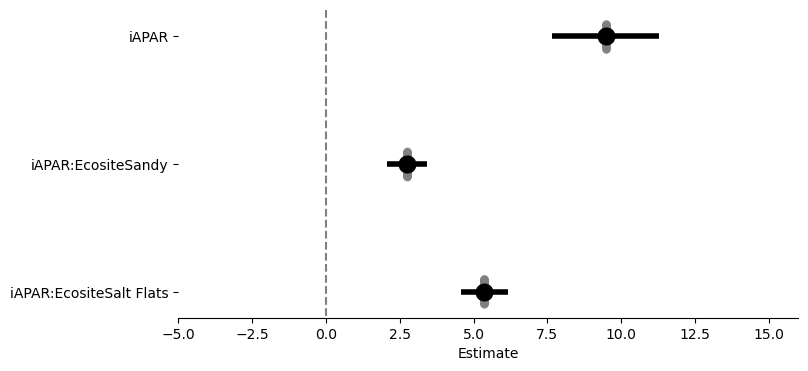

In [43]:
md_mm_ecosite = Lmer(y_var + ' ~ iAPAR + Ecosite:iAPAR + (1|Year) + (1|Year:Block)', data=df_sub)
display(md_mm_ecosite.fit())
md_mm_ecosite.plot_summary(plot_intercept=False, figsize=(8, 4), axlim=axlims)

Linear mixed model fit by REML [’lmerMod’]
Formula: Total_Biomass~iAPAR+Treatment:iAPAR+Ecosite:iAPAR+Treatment:Ecosite:iAPAR+(1|Year)+(1|Year:Block)

Family: gaussian	 Inference: parametric

Number of observations: 852	 Groups: {'Year:Block': 90.0, 'Year': 9.0}

Log-likelihood: -6082.696 	 AIC: 12185.392

Random effects:

                   Name        Var      Std
Year:Block  (Intercept)  14137.924  118.903
Year        (Intercept)  54635.079  233.741
Residual                 83223.111  288.484

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),210.113,-3.490,423.716,108.983,23.214,1.928,0.066,.
iAPAR,9.053,7.194,10.912,0.948,483.949,9.545,0.000,***
iAPAR:TreatmentTGM,-0.107,-0.762,0.547,0.334,763.819,-0.321,0.748,
iAPAR:EcositeSandy,2.864,1.999,3.728,0.441,662.442,6.494,0.000,***
iAPAR:EcositeSalt Flats,4.474,3.385,5.564,0.556,833.898,8.049,0.000,***
iAPAR:TreatmentTGM:EcositeSandy,-0.257,-1.339,0.825,0.552,762.561,-0.465,0.642,
iAPAR:TreatmentTGM:EcositeSalt Flats,1.642,0.210,3.074,0.731,775.144,2.247,0.025,*


<Axes: xlabel='Estimate'>

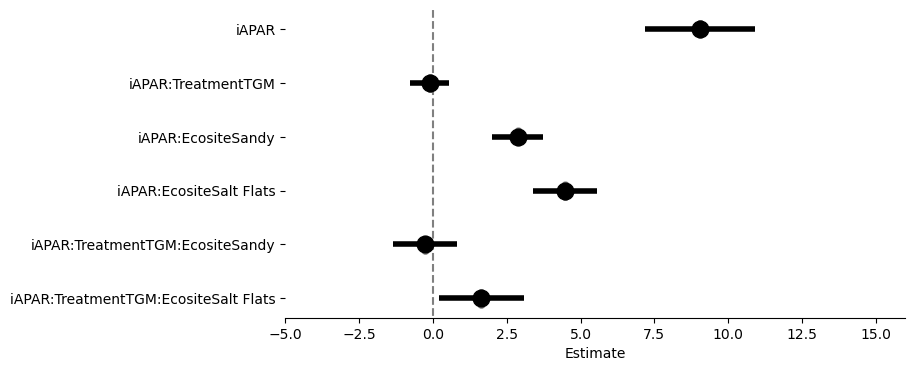

In [44]:
md_mm_treatment_ecosite = Lmer(y_var + ' ~ iAPAR + Treatment:iAPAR + Ecosite:iAPAR + Treatment:Ecosite:iAPAR + (1|Year) + (1|Year:Block)', data=df_sub)
display(md_mm_treatment_ecosite.fit())
md_mm_treatment_ecosite.plot_summary(plot_intercept=False, figsize=(8, 4), axlim=axlims)

Linear mixed model fit by REML [’lmerMod’]
Formula: Total_Biomass~iAPAR+Graze_timing:iAPAR+Ecosite:iAPAR+Graze_timing:Ecosite:iAPAR+(1|Year)+(1|Year:Block)

Family: gaussian	 Inference: parametric

Number of observations: 852	 Groups: {'Year:Block': 90.0, 'Year': 9.0}

Log-likelihood: -6074.015 	 AIC: 12174.030

Random effects:

                   Name        Var      Std
Year:Block  (Intercept)  13939.987  118.068
Year        (Intercept)  51641.525  227.248
Residual                 82443.164  287.129

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),191.191,-17.513,399.895,106.484,23.449,1.796,0.085,.
iAPAR,9.197,7.385,11.009,0.924,498.877,9.948,0.000,***
iAPAR:Graze_timingSeason-long,0.005,-1.498,1.508,0.767,817.240,0.007,0.994,
iAPAR:Graze_timingPulse,0.064,-0.658,0.787,0.369,828.641,0.174,0.862,
iAPAR:EcositeSandy,2.461,1.368,3.554,0.558,760.219,4.414,0.000,***
iAPAR:EcositeSalt Flats,3.540,2.168,4.913,0.700,835.047,5.056,0.000,***
iAPAR:Graze_timingSeason-long:EcositeSandy,2.043,-0.079,4.164,1.082,834.264,1.887,0.059,.
iAPAR:Graze_timingPulse:EcositeSandy,0.098,-1.199,1.395,0.662,833.739,0.148,0.882,
iAPAR:Graze_timingSeason-long:EcositeSalt Flats,2.604,-0.133,5.341,1.396,819.712,1.865,0.063,.
iAPAR:Graze_timingPulse:EcositeSalt Flats,2.445,0.832,4.058,0.823,804.096,2.971,0.003,**


<Axes: xlabel='Estimate'>

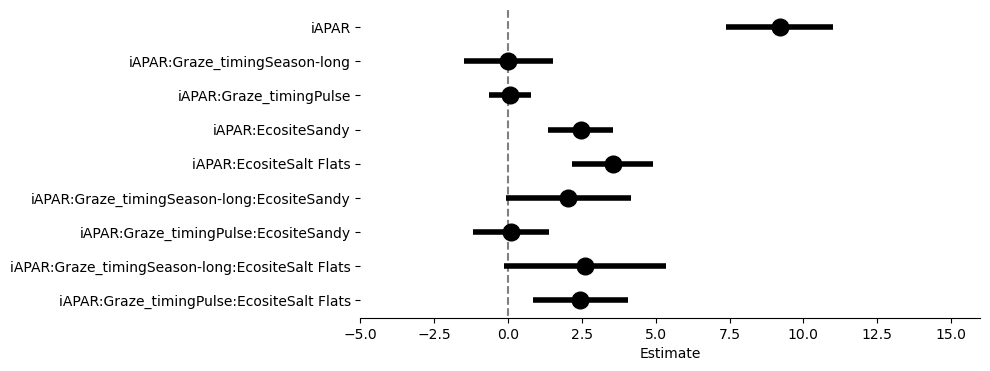

In [45]:
md_mm_graze_ecosite = Lmer(y_var + ' ~ iAPAR + Graze_timing:iAPAR + Ecosite:iAPAR + Graze_timing:Ecosite:iAPAR + (1|Year) + (1|Year:Block)', data=df_sub)
display(md_mm_graze_ecosite.fit())
md_mm_graze_ecosite.plot_summary(plot_intercept=False, figsize=(8, 4), axlim=axlims)

In [46]:
mod_dict = {
    'Null': {
        'model': md_mm_null},
    'CARM': {
        'model': md_mm_treatment},
    'Grazing': {
        'model': md_mm_graze},
    'Ecosite': {
        'model': md_mm_ecosite},
    'CARM + Ecosite': {
        'model': md_mm_treatment_ecosite},
    'Grazing + Ecosite': {
        'model': md_mm_graze_ecosite},
}

In [47]:
for mod in mod_dict:
    r2 = rsquared(mod_dict[mod]['model'].data[y_var], mod_dict[mod]['model'].residuals, has_constant=True)
    r2_adj = rsquared_adj(r2, nobs=len(mod_dict[mod]['model'].residuals), 
                          df_res=(len(mod_dict[mod]['model'].residuals) - len(mod_dict[mod]['model'].coefs)),
                          has_constant=True)
    mod_dict[mod]['R2_adj'] = r2_adj
    mod_dict[mod]['AIC'] = mod_dict[mod]['model'].AIC

In [48]:
mod_dict[mod]['model'].formula

'Total_Biomass~iAPAR+Graze_timing:iAPAR+Ecosite:iAPAR+Graze_timing:Ecosite:iAPAR+(1|Year)+(1|Year:Block)'

In [49]:
df_results = pd.DataFrame({'Model': [k for k in mod_dict.keys()],
                           'AIC': [mod_dict[k]['AIC'] for k in mod_dict.keys()],
                           'R2': [mod_dict[k]['R2_adj'] for k in mod_dict.keys()]})

In [50]:
df_results['AICd'] = df_results['AIC'] - df_results['AIC'].min()

In [51]:
df_results['AICw'] = np.exp( -0.5 * df_results['AICd'])

In [52]:
df_results['formula'] = df_results['Model'].transform(lambda x: mod_dict[x]['model'].formula)

In [53]:
with pd.option_context('display.max_colwidth', 500):
    display(df_results.sort_values('AICd'))

,Model,AIC,R2,AICd,AICw,formula
5,Grazing + Ecosite,12174.029902,0.774827,0.000000,1.000000e+00,Total_Biomass~iAPAR+Graze_timing:iAPAR+Ecosite:iAPAR+Graze_timing:Ecosite:iAPAR+(1|Year)+(1|Year:Block)
4,CARM + Ecosite,12185.392224,0.772741,11.362321,3.409599e-03,Total_Biomass~iAPAR+Treatment:iAPAR+Ecosite:iAPAR+Treatment:Ecosite:iAPAR+(1|Year)+(1|Year:Block)
3,Ecosite,12186.781608,0.771097,12.751705,1.702168e-03,Total_Biomass~iAPAR+Ecosite:iAPAR+(1|Year)+(1|Year:Block)
2,Grazing,12311.493311,0.756572,137.463408,1.413189e-30,Total_Biomass~iAPAR+Graze_timing:iAPAR+(1|Year)+(1|Year:Block)
0,Null,12318.020862,0.755462,143.990960,5.404561e-32,Total_Biomass~iAPAR+(1|Year)+(1|Year:Block)
1,CARM,12319.508028,0.755529,145.478125,2.569369e-32,Total_Biomass~iAPAR+Treatment:iAPAR+(1|Year)+(1|Year:Block)


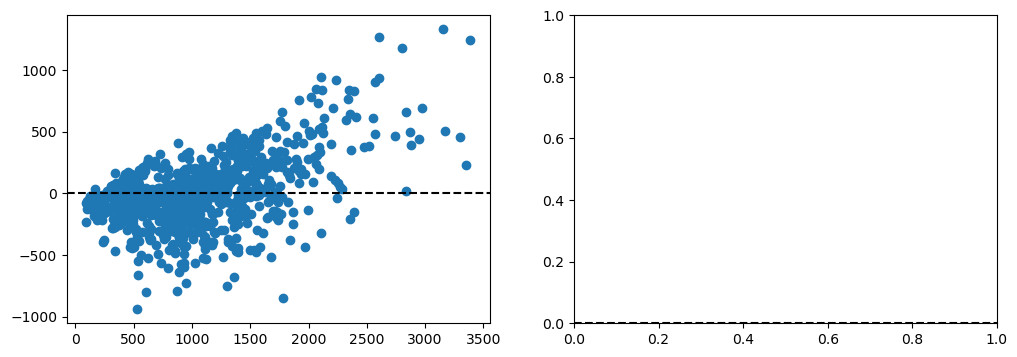

In [54]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].scatter(df_sub['Total_Biomass'], md_mm_graze_ecosite.residuals)
#axs[1].scatter(df_sub['Total_Biomass_sqrt'], md_mm_sqrt.residuals)
for ax in axs:
    ax.axhline(y=0, linestyle='dashed', c='black')

(array([  8.,  25.,  99., 201., 257., 151.,  76.,  25.,   6.,   4.]),
 array([-12.2179861 ,  -9.43346595,  -6.64894579,  -3.86442564,
         -1.07990549,   1.70461467,   4.48913482,   7.27365497,
         10.05817513,  12.84269528,  15.62721543]),
 <BarContainer object of 10 artists>)

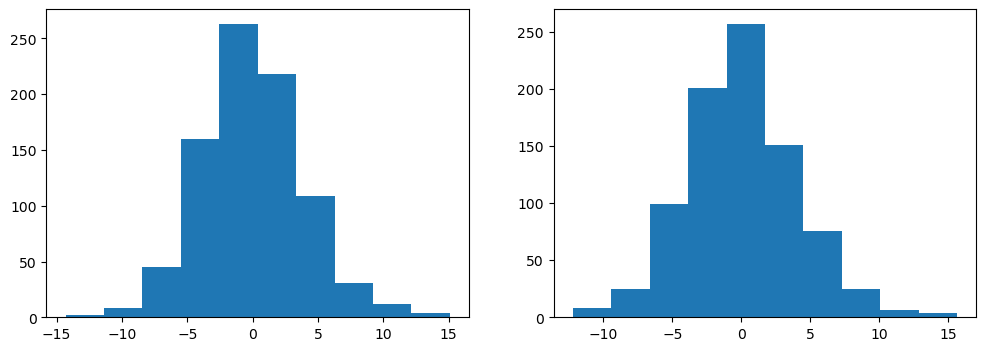

In [225]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].hist(md_mm_ecosite.residuals)
axs[1].hist(md_mm_sqrt.residuals)

In [ ]:

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
probplot(md_mm_ecosite.residuals, dist="norm", plot=axs[0])
axs[0].text(-3, 500, 'Shapiro: ' + str(round(shapiro(md_mm_ecosite.residuals).statistic, 2)))
probplot(md_mm_sqrt.residuals, dist="norm", plot=axs[1])
axs[1].text(-3, 5, 'Shapiro: ' + str(round(shapiro(md_mm_sqrt.residuals).statistic, 2)))
plt.show()

In [55]:
coefs_fnl = md_mm_graze_ecosite.coefs.reset_index().rename(columns={'index': 'Coef'})
coefs_fnl['Coef'] = coefs_fnl['Coef'].apply(lambda x: re.sub('Ecosite', '', 
                                         re.sub('Graze_timing', '', x)))
coefs_fnl = coefs_fnl[coefs_fnl['Coef'] != '(Intercept)']
colors = coefs_fnl.apply(lambda x: 'grey' if x['Sig'] == '' else 'black', axis=1).astype(str).values

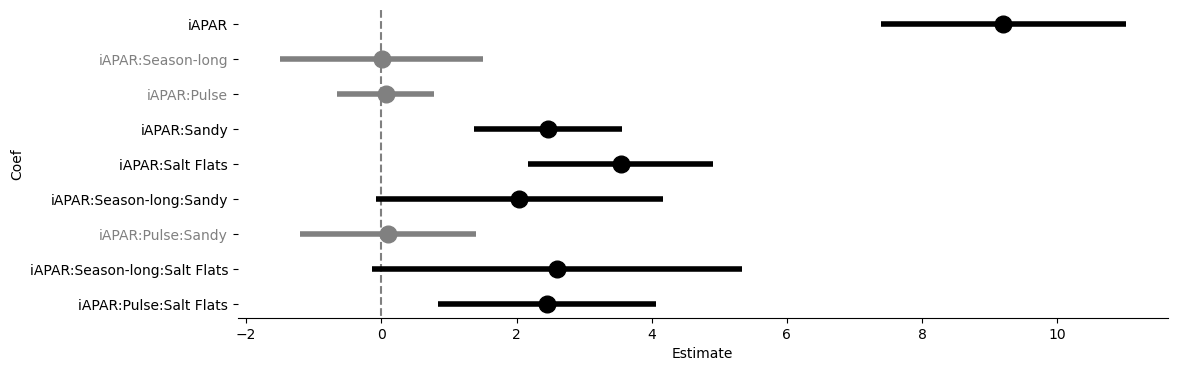

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
col_lb = (coefs_fnl["Estimate"] - coefs_fnl["2.5_ci"]).values
col_ub = (coefs_fnl["97.5_ci"] - coefs_fnl["Estimate"]).values

x_strip = "Estimate"
x_err = coefs_fnl["Estimate"]
y_strip = "Coef"
y_err = np.array([x for x in range(len(coefs_fnl))])
xerr = [col_lb, col_ub]
yerr = None
ax.vlines(
    x=0, ymin=-1, ymax=len(coefs_fnl), linestyles="--", color="grey"
)
xlim = (-5.0, 13)
ylim = None
sns.stripplot(
            x=x_strip, y=y_strip, data=coefs_fnl, ax=ax, size=6, alpha=0, color="grey"
        )
for c in np.unique(colors):
    ax.errorbar(
                x=x_err[colors == c],
                y=y_err[colors == c],
                xerr=[col_lb[colors == c], col_ub[colors == c]],
                yerr=yerr,
                fmt="o",
                capsize=0,
                elinewidth=4,
                color=c,
                ms=12,
                zorder=9999999999,
            )
    [ax.get_yticklabels()[i].set_color(c) for i, color in enumerate(colors) if color == c]
    #ax.get_yticklabels()[colors == c].set_color("red")
sns.despine(top=True, right=True, left=True)

/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

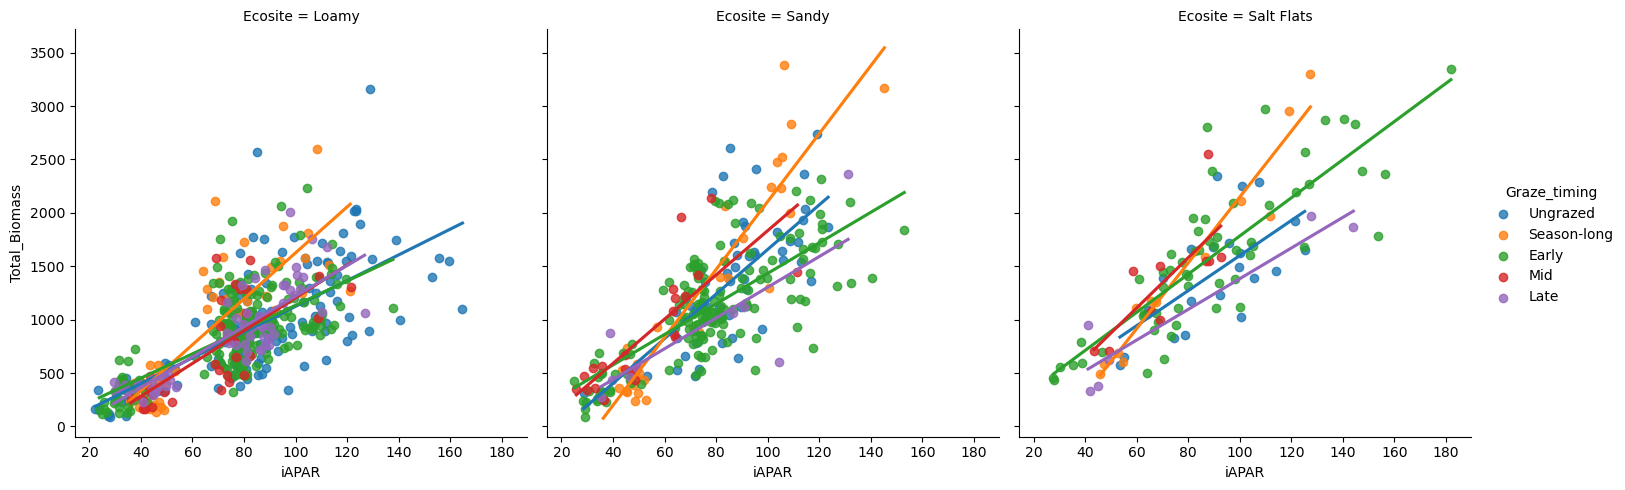

In [227]:
plt.figure()
sns.lmplot(x='iAPAR', y='Total_Biomass', hue='Graze_timing', col='Ecosite', ci=None, 
           data=df_sub)
plt.show()

In [207]:
df['pred_biomass'] = md_mm_graze_ecosite.predict(df, skip_data_checks=True, use_rfx=True, verify_predictions=False)
df['pred_biomass_no_rf'] = md_mm_graze_ecosite.predict(df, skip_data_checks=True, use_rfx=False, verify_predictions=False)
df['resid_biomass'] = df['Total_Biomass'] - df['pred_biomass']
df['resid_biomass_no_rf'] = df['Total_Biomass'] - df['pred_biomass_no_rf']

/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


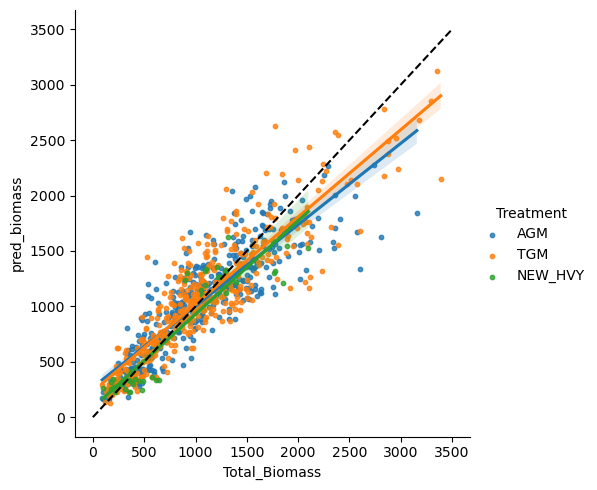

In [167]:
p = sns.lmplot(x='Total_Biomass', y='pred_biomass', hue='Treatment', data=df,
            scatter_kws=dict(s=10))
p.ax.plot(np.arange(0, 3500), np.arange(0, 3500), c='black', linestyle='dashed')

/home/spkearney/miniconda3/envs/pymer4/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


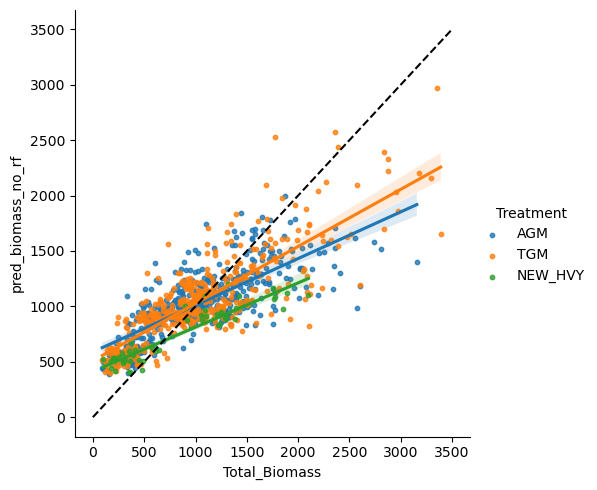

In [168]:
p = sns.lmplot(x='Total_Biomass', y='pred_biomass_no_rf', hue='Treatment', data=df,
            scatter_kws=dict(s=10))
p.ax.plot(np.arange(0, 3500), np.arange(0, 3500), c='black', linestyle='dashed')

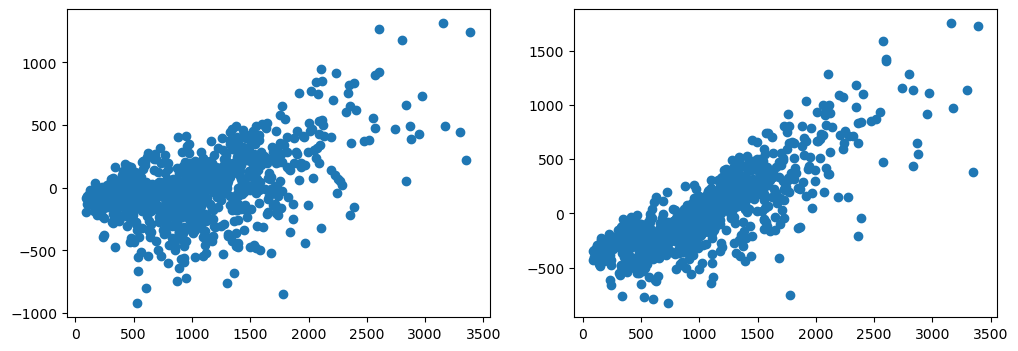

In [208]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].scatter(df_sub['Total_Biomass'], df['resid_biomass'][df['Treatment'].isin(['AGM', 'TGM'])])
axs[1].scatter(df_sub['Total_Biomass'], df['resid_biomass_no_rf'][df['Treatment'].isin(['AGM', 'TGM'])])